## Different Models for different Problems
- Some guiding principles:
- Size of the dataset:
    - Fewer features= simpler model, faster trianing time
    - Some models require large amounts of data to perform well
- Interpretbility
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coeffcients
- Flexibility
    - May imporve accruacy by making fewer assumptions
    - KNN is a mre flexible model, doesn't assume linearity

## Its all metrics:
- Regression model performace:
    - RMSE
    - R-squared
- Classification model performance:
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC
- Train several models and evaluate perormance out of the box
## Scaling
- Models affected by scaling:
    - KNN
    - Linear Regression (plus Ridge, Lasso)
    - Logistic Regression
    - ANN
- Best to scale our data before evaluating models

In [1]:
print('hello world')

hello world


scaling data
defining models


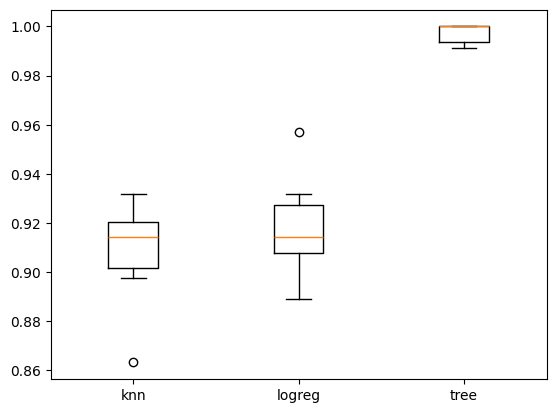

In [ ]:
#Evaluating classification models
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

music_df=pd.read_csv('..\\data\\music_clean.csv')
X=music_df.drop('genre',axis=1).values
y=music_df['genre'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
scaler=StandardScaler()

print('scaling data')
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

models={
    'knn':KNeighborsClassifier(),
    'logreg':LogisticRegression(),
    'tree':DecisionTreeClassifier()}
results=[]
print('defining models')

for model in models.values():
    kfold=KFold(n_splits=6,shuffle=True,random_state=42)
    cv_results=cross_val_score(model,X_train_scaled,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)


plt.boxplot(results,tick_labels=models.keys())
plt.show()


In [5]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score=model.score(X_test_scaled,y_test)
    print(name,test_score)

knn 0.8966666666666666
logreg 0.9133333333333333
tree 1.0


## Datacamp

C:\Users\abhip\AppData\Local\Temp\ipykernel_36124\166146083.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


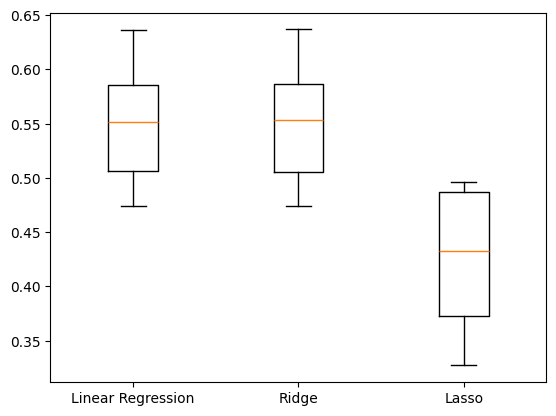

In [7]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [8]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

for name, model in models.items():
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.3493364810437578
Ridge Test Set RMSE: 0.3493290568356299
Lasso Test Set RMSE: 0.3774661569057331


C:\Users\abhip\AppData\Local\Temp\ipykernel_36124\3247224281.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


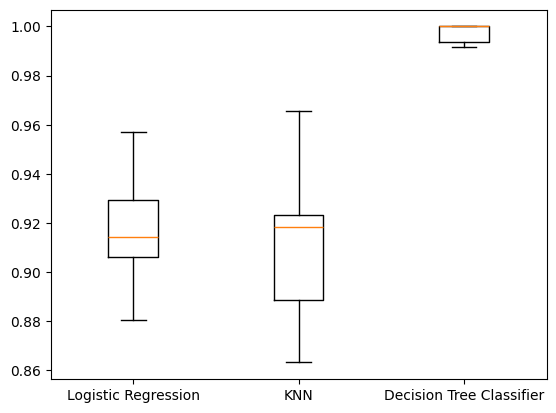

In [10]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [13]:
# Create steps
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test,y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': np.float64(0.223), 'logreg__solver': 'newton-cg'}, Accuracy: 0.9066666666666666
